# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import random
from scipy.stats import linregress

# Import API key
from Homework6_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Save info:
lat = []
lng = []
temp = []
cloud =[]
wind = []
humi = []
city_final = []
country = []
date=[]

#Count Cities
m=0
t=0
tot_cities = len(cities)
# Loop through the list of cities and perform a request for data on each

print(f"All Cities being processed:\n -------------------------------")

for city in cities:
    t+=1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        humi.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_final.append(city)
        print(f"Processing {t} out of {tot_cities}. City {city} founded ({t-m} city founded)")
    except:
        m+=1
        print(f"Processing {t} out of {tot_cities}. City {city} not founded ({m} not city founded)")
        

print(f"All Cities processed:{t-m} cities founded and {m} cities not founded")


All Cities being processed:
 -------------------------------
Processing 1 out of 627. City pochutla founded (1 city founded)
Processing 2 out of 627. City bengkulu founded (2 city founded)
Processing 3 out of 627. City sentyabrskiy not founded (1 not city founded)
Processing 4 out of 627. City taolanaro not founded (2 not city founded)
Processing 5 out of 627. City catamarca founded (3 city founded)
Processing 6 out of 627. City rikitea founded (4 city founded)
Processing 7 out of 627. City hilo founded (5 city founded)
Processing 8 out of 627. City lufkin founded (6 city founded)
Processing 9 out of 627. City longyearbyen founded (7 city founded)
Processing 10 out of 627. City carnarvon founded (8 city founded)
Processing 11 out of 627. City saskylakh founded (9 city founded)
Processing 12 out of 627. City port augusta founded (10 city founded)
Processing 13 out of 627. City torbay founded (11 city founded)
Processing 14 out of 627. City lebu founded (12 city founded)
Processing 15 ou

Processing 122 out of 627. City ekhabi founded (110 city founded)
Processing 123 out of 627. City saint-francois founded (111 city founded)
Processing 124 out of 627. City coxim founded (112 city founded)
Processing 125 out of 627. City salinas founded (113 city founded)
Processing 126 out of 627. City thompson founded (114 city founded)
Processing 127 out of 627. City nakajo not founded (13 not city founded)
Processing 128 out of 627. City coffeyville founded (115 city founded)
Processing 129 out of 627. City illoqqortoormiut not founded (14 not city founded)
Processing 130 out of 627. City henties bay founded (116 city founded)
Processing 131 out of 627. City ocher founded (117 city founded)
Processing 132 out of 627. City rio gallegos founded (118 city founded)
Processing 133 out of 627. City chokurdakh founded (119 city founded)
Processing 134 out of 627. City sergeyevka founded (120 city founded)
Processing 135 out of 627. City kadoma founded (121 city founded)
Processing 136 out 

Processing 241 out of 627. City zyryanka founded (223 city founded)
Processing 242 out of 627. City ovsyanka founded (224 city founded)
Processing 243 out of 627. City biloela founded (225 city founded)
Processing 244 out of 627. City yenagoa founded (226 city founded)
Processing 245 out of 627. City sorland founded (227 city founded)
Processing 246 out of 627. City carutapera founded (228 city founded)
Processing 247 out of 627. City fukue founded (229 city founded)
Processing 248 out of 627. City grand gaube founded (230 city founded)
Processing 249 out of 627. City attawapiskat not founded (19 not city founded)
Processing 250 out of 627. City poum founded (231 city founded)
Processing 251 out of 627. City haicheng founded (232 city founded)
Processing 252 out of 627. City mobaye founded (233 city founded)
Processing 253 out of 627. City kibre mengist founded (234 city founded)
Processing 254 out of 627. City arzgir founded (235 city founded)
Processing 255 out of 627. City mandalgov

Processing 360 out of 627. City guelengdeng not founded (28 not city founded)
Processing 361 out of 627. City lompoc founded (333 city founded)
Processing 362 out of 627. City hamilton founded (334 city founded)
Processing 363 out of 627. City nhulunbuy founded (335 city founded)
Processing 364 out of 627. City kieta founded (336 city founded)
Processing 365 out of 627. City weston founded (337 city founded)
Processing 366 out of 627. City airai founded (338 city founded)
Processing 367 out of 627. City asheboro founded (339 city founded)
Processing 368 out of 627. City vallenar founded (340 city founded)
Processing 369 out of 627. City tezu founded (341 city founded)
Processing 370 out of 627. City veracruz founded (342 city founded)
Processing 371 out of 627. City loreto founded (343 city founded)
Processing 372 out of 627. City rocha founded (344 city founded)
Processing 373 out of 627. City atar founded (345 city founded)
Processing 374 out of 627. City nicoya founded (346 city fou

Processing 480 out of 627. City conil founded (440 city founded)
Processing 481 out of 627. City novobohdanivka founded (441 city founded)
Processing 482 out of 627. City khrebtovaya founded (442 city founded)
Processing 483 out of 627. City seredka founded (443 city founded)
Processing 484 out of 627. City ust-koksa founded (444 city founded)
Processing 485 out of 627. City surt founded (445 city founded)
Processing 486 out of 627. City trinidad founded (446 city founded)
Processing 487 out of 627. City anadyr founded (447 city founded)
Processing 488 out of 627. City kimbe founded (448 city founded)
Processing 489 out of 627. City ambodifototra not founded (41 not city founded)
Processing 490 out of 627. City balod founded (449 city founded)
Processing 491 out of 627. City berezovyy founded (450 city founded)
Processing 492 out of 627. City tiksi founded (451 city founded)
Processing 493 out of 627. City lichtenfels founded (452 city founded)
Processing 494 out of 627. City harlingen

Processing 600 out of 627. City artyk not founded (47 not city founded)
Processing 601 out of 627. City maykain not founded (48 not city founded)
Processing 602 out of 627. City cabo san lucas founded (554 city founded)
Processing 603 out of 627. City toliary not founded (49 not city founded)
Processing 604 out of 627. City alice springs founded (555 city founded)
Processing 605 out of 627. City mitu founded (556 city founded)
Processing 606 out of 627. City shimoda founded (557 city founded)
Processing 607 out of 627. City fonte boa founded (558 city founded)
Processing 608 out of 627. City bubaque founded (559 city founded)
Processing 609 out of 627. City wajir founded (560 city founded)
Processing 610 out of 627. City pucallpa founded (561 city founded)
Processing 611 out of 627. City znamenskoye founded (562 city founded)
Processing 612 out of 627. City talara founded (563 city founded)
Processing 613 out of 627. City buy founded (564 city founded)
Processing 614 out of 627. City m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":city_final,
                          "Lat":lat,
                          "Lng":lng,
                          "Max Temperature (F)": temp,
                          "Humidity":humi,
                           "Cloudiness":cloud,
                           "Wind Speed":wind,
                           "Country":country,
                           "Date":date})

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 576 non-null    object 
 1   Lat                  576 non-null    float64
 2   Lng                  576 non-null    float64
 3   Max Temperature (F)  576 non-null    float64
 4   Humidity             576 non-null    int64  
 5   Cloudiness           576 non-null    int64  
 6   Wind Speed           576 non-null    float64
 7   Country              576 non-null    object 
 8   Date                 576 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.6+ KB


In [5]:
weather_df.head()

,City,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,pochutla,15.74,-96.47,80.60,78,90,9.17,MX,1591551756
1,bengkulu,-3.80,102.27,77.09,81,73,4.52,ID,1591551757
2,catamarca,-28.47,-65.79,68.00,49,0,7.00,AR,1591551757
3,rikitea,-23.12,-134.97,72.72,94,100,27.65,PF,1591551758
4,hilo,19.73,-155.09,73.40,78,90,6.93,US,1591551758


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,18.643385,19.303316,68.200990,67.329861,51.196181,8.133403,1.591552e+09
std,32.824753,91.011749,15.337732,20.045137,36.372489,5.615715,7.494784e+01
min,-54.800000,-179.170000,31.440000,10.000000,0.000000,0.250000,1.591551e+09
25%,-7.915000,-61.267500,57.000000,54.000000,19.750000,3.800000,1.591552e+09
50%,21.090000,24.700000,69.800000,70.000000,51.000000,6.930000,1.591552e+09
75%,45.380000,100.342500,80.160000,83.000000,87.000000,11.410000,1.591552e+09
max,78.220000,177.480000,107.460000,100.000000,100.000000,36.910000,1.591552e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
to_clean = weather_df[weather_df["Humidity"]>100].index

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df_new = weather_df[weather_df["Humidity"]<=100]
clean_city_data = weather_df.drop(index = to_clean, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,pochutla,15.74,-96.47,80.60,78,90,9.17,MX,1591551756
1,bengkulu,-3.80,102.27,77.09,81,73,4.52,ID,1591551757
2,catamarca,-28.47,-65.79,68.00,49,0,7.00,AR,1591551757
3,rikitea,-23.12,-134.97,72.72,94,100,27.65,PF,1591551758
4,hilo,19.73,-155.09,73.40,78,90,6.93,US,1591551758


In [9]:
# Extract relevant fields from the data frame
clean_city_data = clean_city_data.drop(columns='Date')

# Export the City_Data into a csv
clean_city_data.to_csv("Output/weather_csv.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
def weather_graph (x,y,label,grid=False,reg=False,title='notitle'):
    from datetime import date
    day = date.today()
    plt.scatter(x,y,marker='o',edgecolors="black")
    plt.grid(grid)
    plt.xlabel('Latitude')
    plt.ylabel(label)
    
    if title != "notitle":
        title_plot = f"City Latitude vs. {title} {day}"
        plt.title(title_plot)
    
    if reg==True:
        (slope, intercept,rvalue,pvalue,stderr)= linregress(x,y)
        regress_values = x*slope + intercept
        line_eq = "y = "+str(round(slope,2)) +"x + " + str(round(intercept,2))
        plt.plot(x,regress_values,"r-")
        plt.annotate(line_eq,fontsize=15, color="red")
        print(f"The R-square = {round(rvalue**2,2)}")
    plt.show()
    

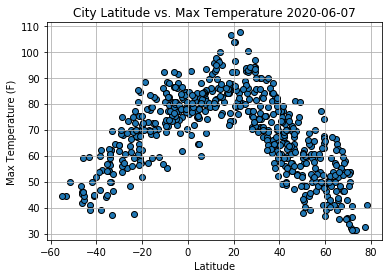

In [11]:
weather_graph(clean_city_data['Lat'],clean_city_data['Max Temperature (F)'],'Max Temperature (F)',True,False,"Max Temperature")

## Latitude vs. Humidity Plot

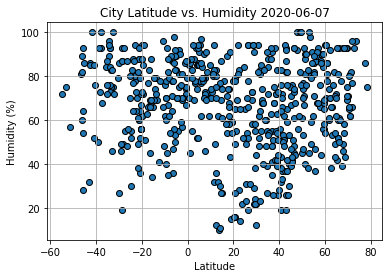

In [12]:
weather_graph(clean_city_data['Lat'],clean_city_data['Humidity'],'Humidity (%)',True,False,"Humidity")

## Latitude vs. Cloudiness Plot

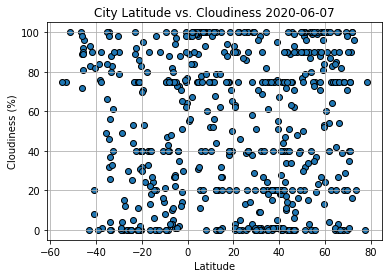

In [13]:
weather_graph(clean_city_data['Lat'],clean_city_data['Cloudiness'],'Cloudiness (%)',True,False,"Cloudiness")

## Latitude vs. Wind Speed Plot

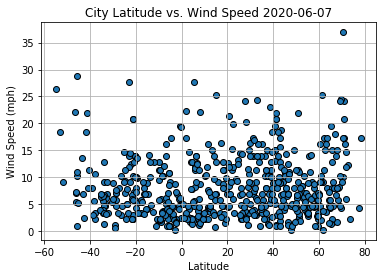

In [14]:
weather_graph(clean_city_data['Lat'],clean_city_data['Wind Speed'],'Wind Speed (mph)',True,False,"Wind Speed")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def weather_graph2 (x,y,label,grid=False,reg=False):

    min_x = x.min()+5
    min_y = y.min()+5
    plt.scatter(x,y,marker='o')
    plt.grid(grid)
    plt.xlabel('Latitude')
    plt.ylabel(label)
    
    if reg==True:
        (slope, intercept,rvalue,pvalue,stderr)= linregress(x,y)
        regress_values = x*slope + intercept
        line_eq = "y = "+str(round(slope,2)) +"x + " + str(round(intercept,2))
        plt.plot(x,regress_values,"r-")
        plt.annotate(line_eq,(min_x,min_y),fontsize=15, color="red")
        print(f"The R-square = {round(rvalue**2,2)}")
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames

north_df=clean_city_data[clean_city_data['Lat']>=0]
south_df = clean_city_data[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-square = 0.62


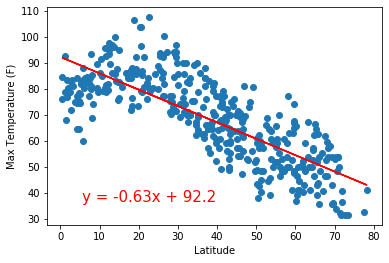

In [17]:
weather_graph2(north_df['Lat'],north_df['Max Temperature (F)'],'Max Temperature (F)',reg=True)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-square = 0.64


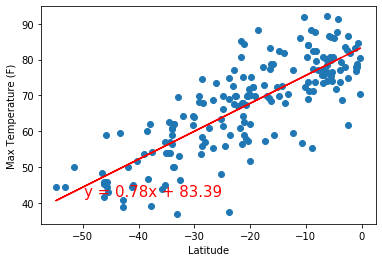

In [18]:
weather_graph2(south_df['Lat'],south_df['Max Temperature (F)'],'Max Temperature (F)',reg=True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-square = 0.0


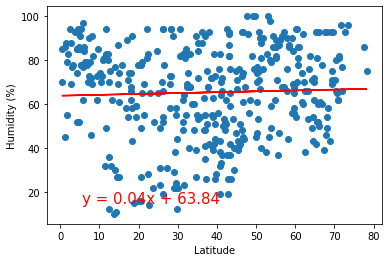

In [19]:
weather_graph2(north_df['Lat'],north_df['Humidity'],'Humidity (%)',reg=True)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-square = 0.0


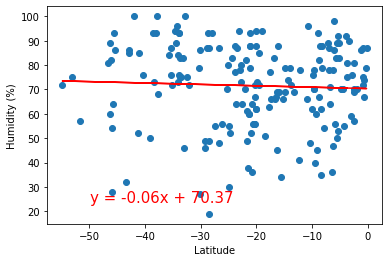

In [20]:
weather_graph2(south_df['Lat'],south_df['Humidity'],'Humidity (%)',reg=True)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-square = 0.0


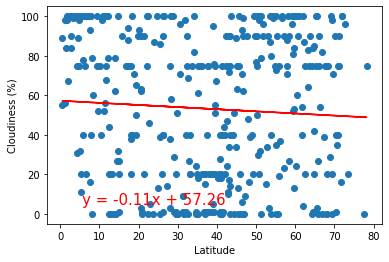

In [21]:
weather_graph2(north_df['Lat'],north_df['Cloudiness'],'Cloudiness (%)',reg=True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-square = 0.03


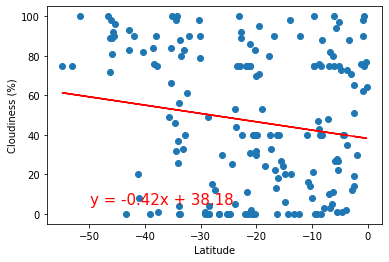

In [22]:
weather_graph2(south_df['Lat'],south_df['Cloudiness'],'Cloudiness (%)',reg=True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-square = 0.01


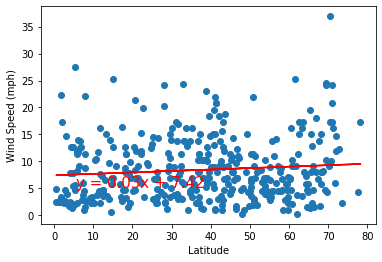

In [23]:
weather_graph2(north_df['Lat'],north_df['Wind Speed'],'Wind Speed (mph)',reg=True)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-square = 0.05


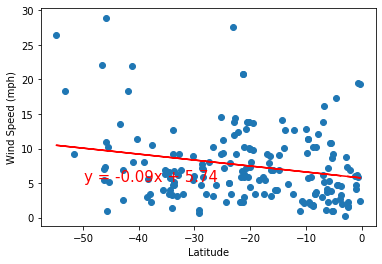

In [24]:
weather_graph2(south_df['Lat'],south_df['Wind Speed'],'Wind Speed (mph)',reg=True)